In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
print(os.listdir())
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [ ]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 2020pceitishika12@poornima.org
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants


100%|██████████| 89.0M/89.0M [00:01<00:00, 79.4MB/s]


In [ ]:
nRowsRead = 1000
file_path = '/content/zomato-bangalore-restaurants/zomato.csv'
try:
  dataframe = pd.read_csv(file_path, delimiter=',', nrows=nRowsRead, on_bad_lines='skip')
  nRow, nCol = dataframe.shape
  print(f'There are {nRow} rows and {nCol} columns')
except FileNotFoundError:
  print(f"Error : File not found at '{file_path}'")
except pd.errors.ParserError as e:
    print(f"Error parsing CSV file: {e}")

    with open(file_path, 'r') as f:
        for i, line in enumerate(f):
            if i == 8:  # Adjust the line number accordingly
                break

There are 1000 rows and 17 columns


In [ ]:
def plotPerColumnDistribution(dataframe, nGraphShown, nGraphPerRow):
    nunique = dataframe.nunique()
    df = dataframe[[col for col in dataframe if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
dataframe.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
def Rate(value):
    if isinstance(value, str):
        value = str(value).split('/')
        value = value[0]
        if value.replace('.', '', 1).isdigit():
            return float(value)
        else:
            return None
    else:
        return value

dataframe['rate'] = dataframe['rate'].apply(Rate)
print(dataframe.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    7

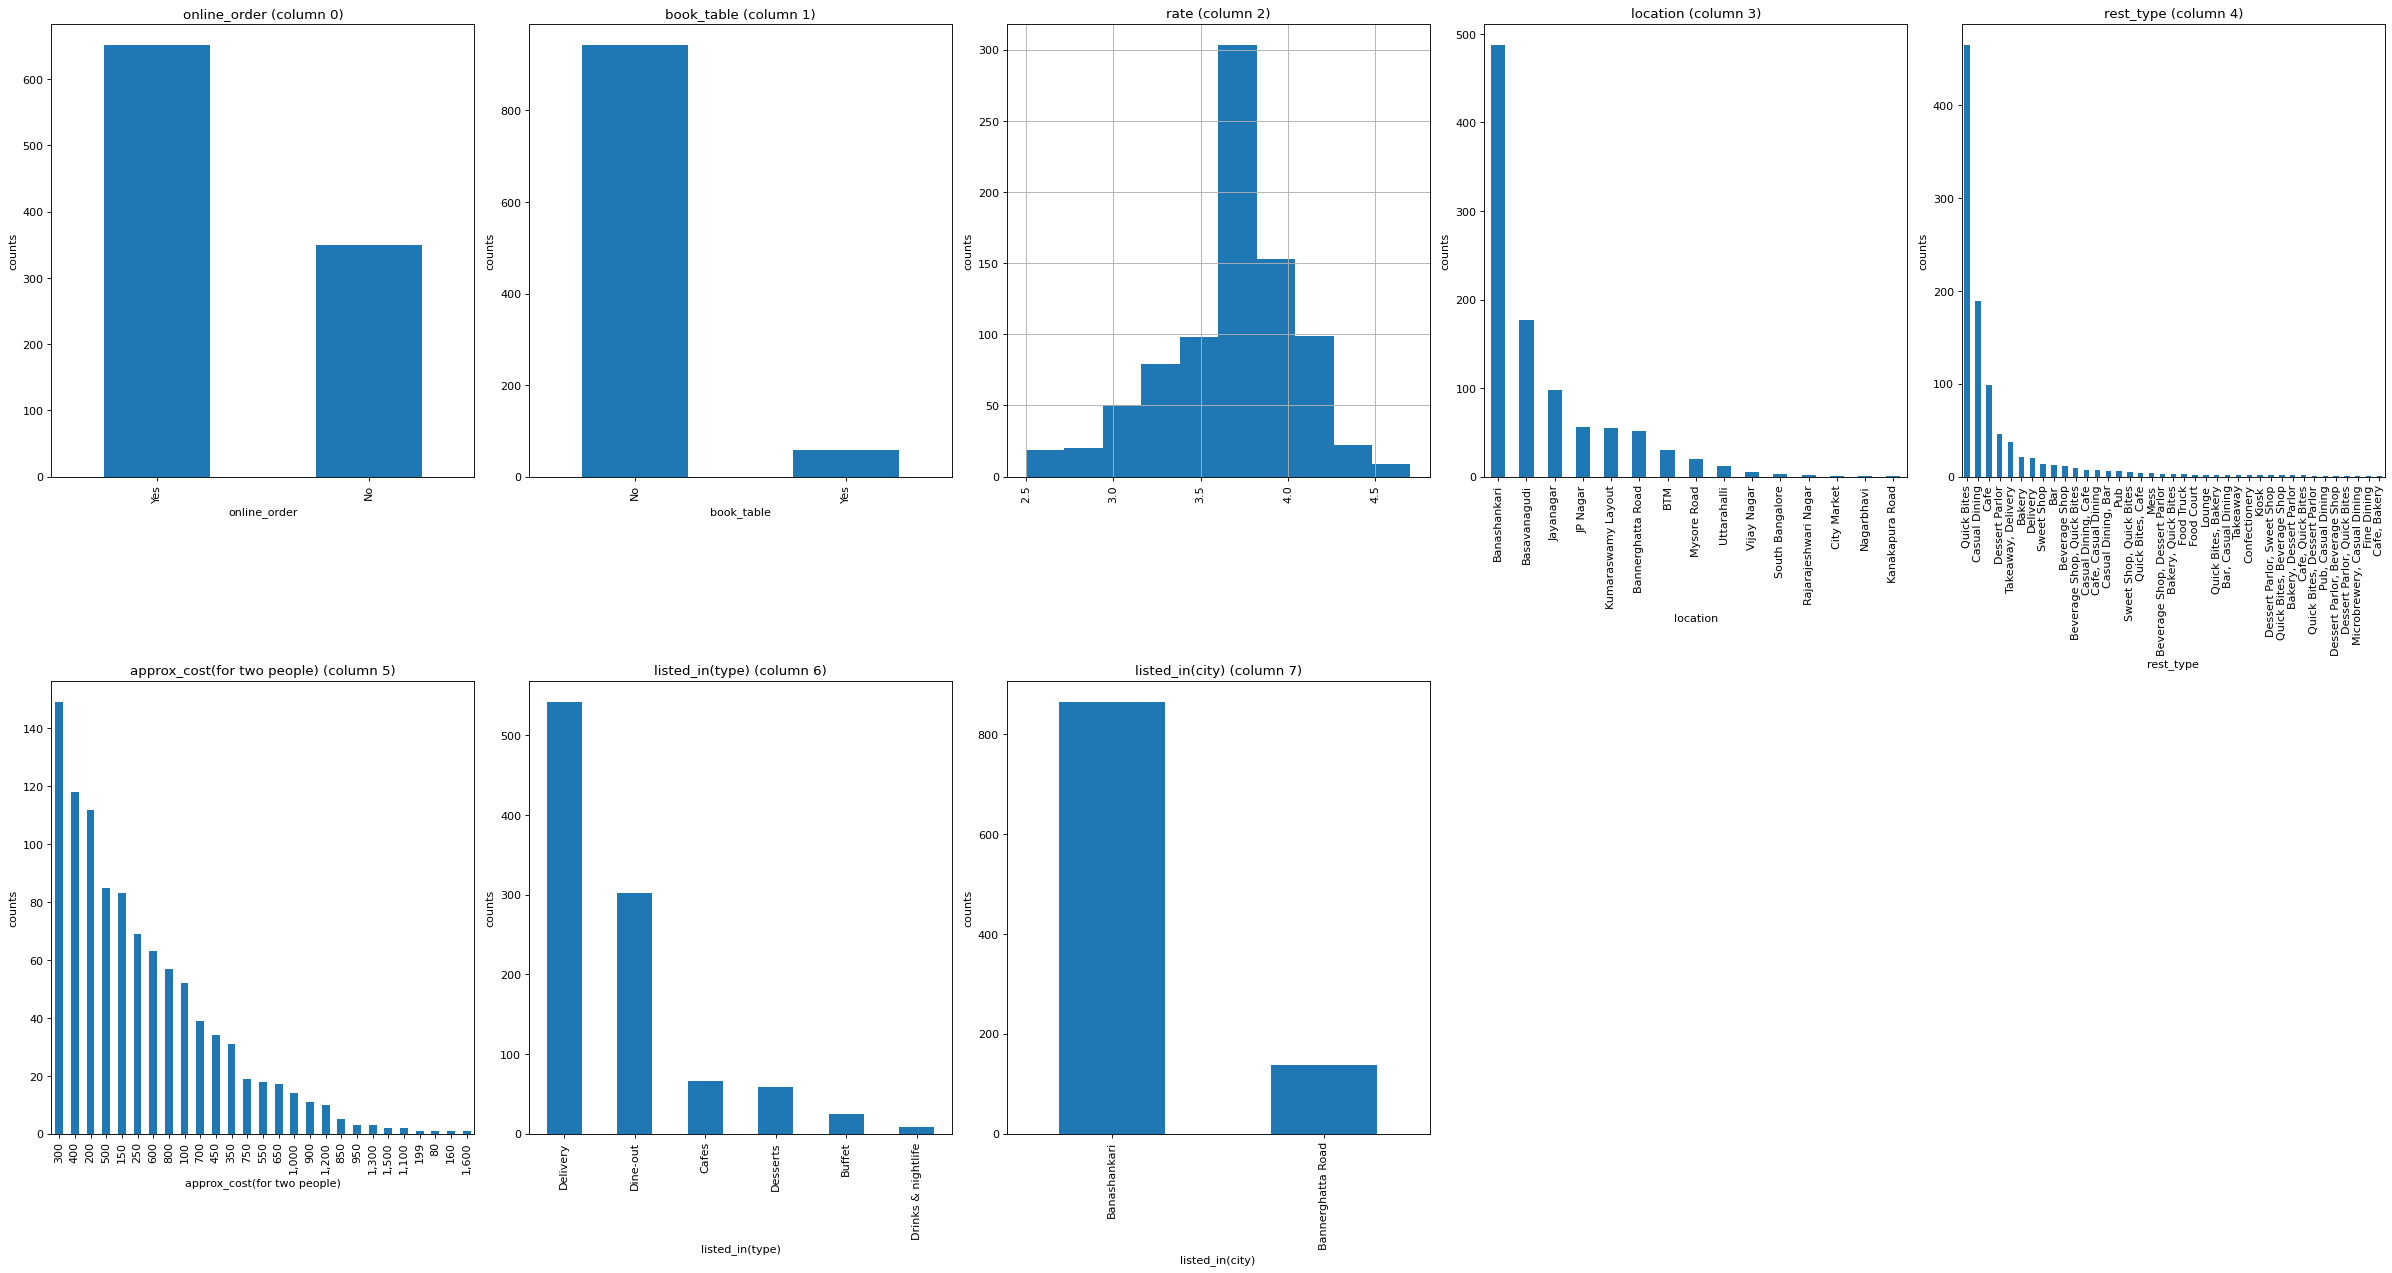

In [ ]:
plotPerColumnDistribution(dataframe, 10, 5)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          1000 non-null   object 
 1   address                      1000 non-null   object 
 2   name                         1000 non-null   object 
 3   online_order                 1000 non-null   object 
 4   book_table                   1000 non-null   object 
 5   rate                         852 non-null    float64
 6   votes                        1000 non-null   int64  
 7   phone                        984 non-null    object 
 8   location                     1000 non-null   object 
 9   rest_type                    999 non-null    object 
 10  dish_liked                   453 non-null    object 
 11  cuisines                     997 non-null    object 
 12  approx_cost(for two people)  1000 non-null   object 
 13  reviews_list       

<function matplotlib.pyplot.show(close=None, block=None)>

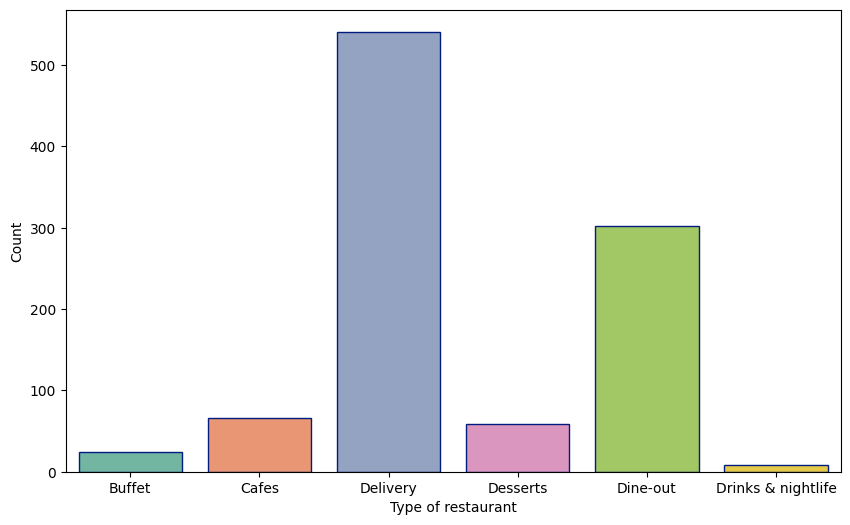

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=dataframe['listed_in(type)'], palette='Set2', edgecolor=sns.color_palette("dark", 10))
plt.xlabel("Type of restaurant")
plt.ylabel("Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

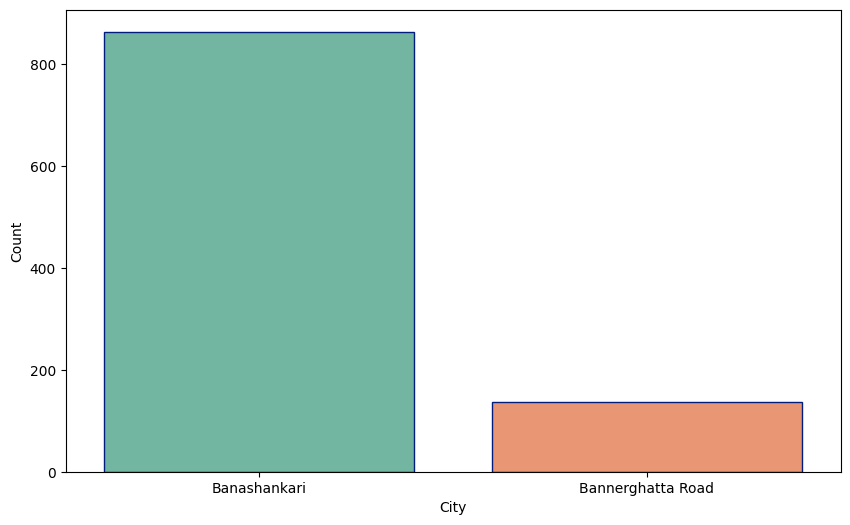

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=dataframe['listed_in(city)'], palette='Set2', edgecolor=sns.color_palette("dark", 10))
plt.xlabel("City")
plt.ylabel("Count")
plt.show

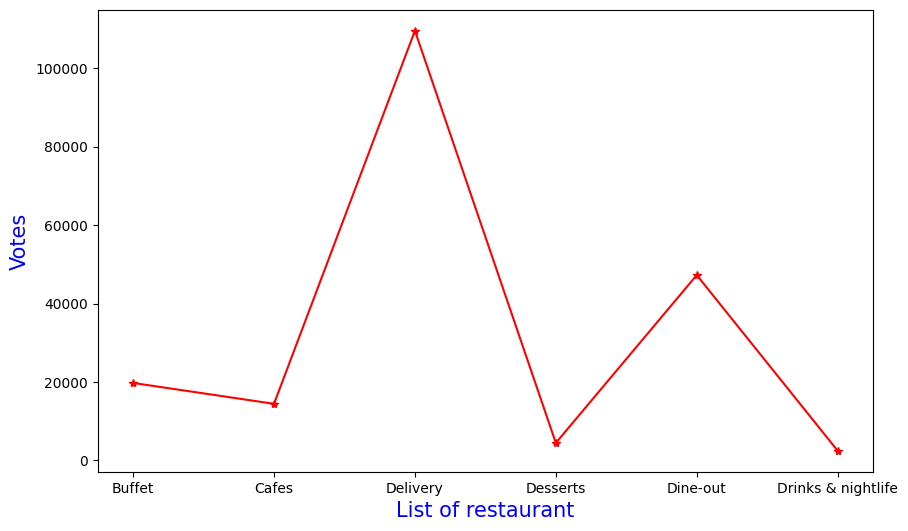

In [ ]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
plt.figure(figsize=(10, 6))
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="red", marker="*")
plt.xlabel("List of restaurant", c="blue", size=15)
plt.ylabel("Votes", c="blue", size=15)
plt.show()


Conclusion:Larger number of individuals prefer delivery over dine-out.

In [ ]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

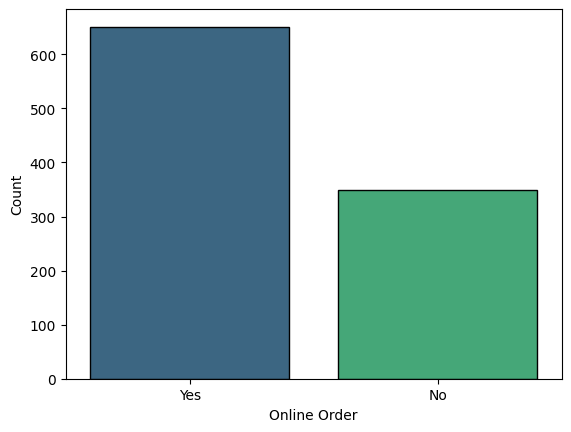

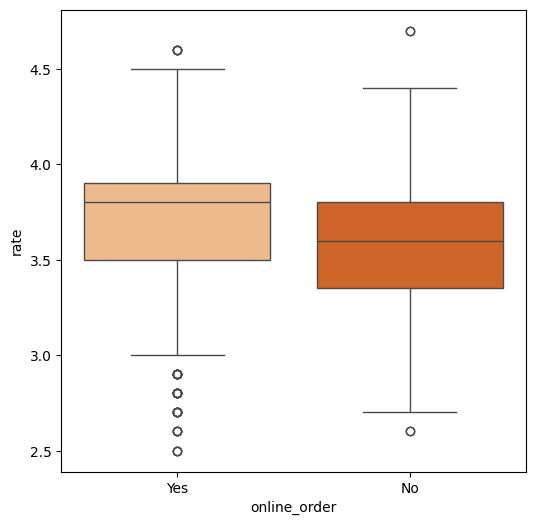

In [ ]:
sns.countplot(x=dataframe['online_order'],palette='viridis', edgecolor='black')
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.show
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe,palette='Oranges')
plt.show

Conclusion: 1. The first graph shows that a majority of resturants do accept online orders.
2. The second graph shows the offline orders received similar ratings in comparison to online orders.


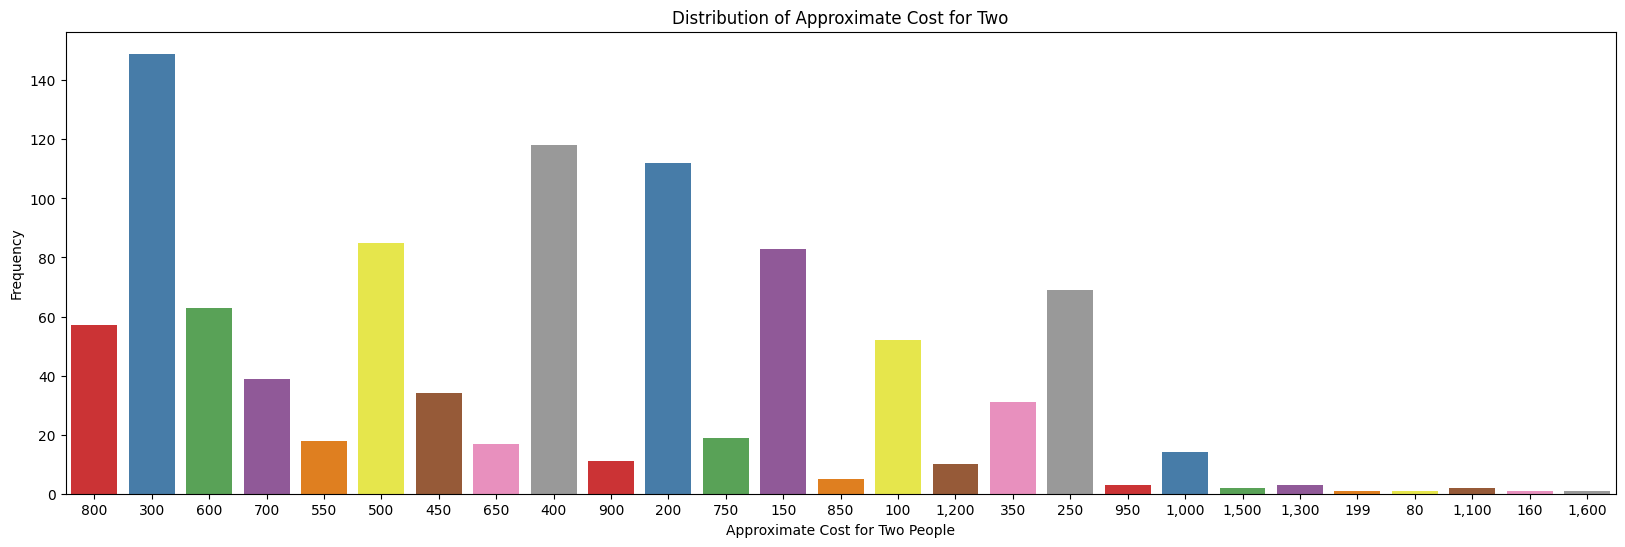

In [ ]:
couple_data=dataframe['approx_cost(for two people)']
plt.figure(figsize=(20, 6))
sns.countplot(x=couple_data, palette='Set1')
plt.xlabel('Approximate Cost for Two People')
plt.ylabel('Frequency')
plt.title('Distribution of Approximate Cost for Two')
plt.show()

The above graph shows that the majority of couples prefer restaurants with an approximate cost of 300 rupees.

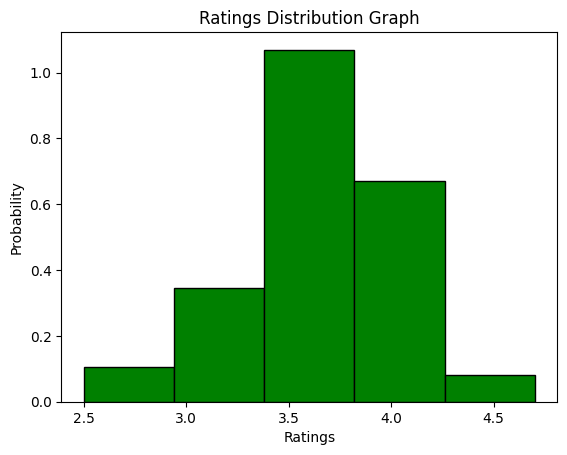

In [ ]:
plt.hist(dataframe['rate'], bins=5, color='green', edgecolor='black', density=True)
plt.title("Ratings Distribution Graph")
plt.xlabel("Ratings")
plt.ylabel("Probability")
plt.show()

The majority of restaurants received ratings ranging from 3.5 to 4.

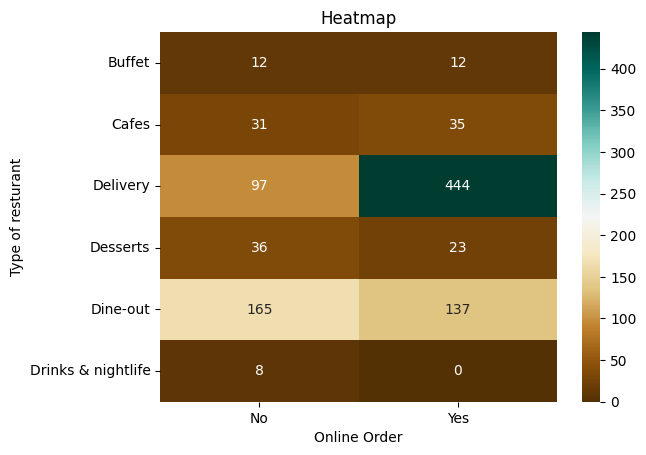

In [ ]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="BrBG", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Type of resturant")
plt.show()


CONCLUSION: Dining restaurants primarily accept offline orders. Therefore it shows that the clients prefer to place orders in person at restaurant, but prefer online ordering at cafes.

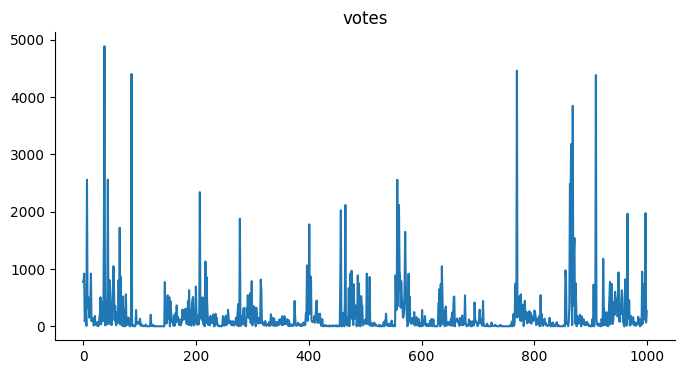

In [ ]:
dataframe['votes'].plot(kind='line', figsize=(8, 4), title='votes')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninst

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
if 'address' in dataframe.columns:
    dataframe = dataframe.drop(['address'], axis=1)
    dataframe = dataframe.dropna()
else:
    print("Columns 'url' and/or 'address' not found in the DataFrame.")

In [ ]:
dataframe = dataframe.dropna(subset=['rate'])

In [ ]:
# Check the data type of the 'rate' column
print(dataframe['rate'].dtype)

# If it's not a string, convert it back to string before using .str
if dataframe['rate'].dtype != object:  # Assuming 'object' dtype represents strings
    dataframe['rate'] = dataframe['rate'].astype(str)

# Now we apply the string replacement and conversion
dataframe['rate'] = dataframe['rate'].str.replace('/5', '').astype(float)

float64


In [ ]:
features = ['location', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)']
X = dataframe[features]
y = dataframe['rate']


In [ ]:
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Output layer for regression
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)


Epoch 1/50
9/9 [==============================] - 1s 31ms/step - loss: 15.6551 - mae: 3.9195 - val_loss: 14.1915 - val_mae: 3.7544
Epoch 2/50
9/9 [==============================] - 0s 8ms/step - loss: 13.7298 - mae: 3.6630 - val_loss: 12.3820 - val_mae: 3.5038
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 12.0028 - mae: 3.4229 - val_loss: 10.6976 - val_mae: 3.2519
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 10.0415 - mae: 3.0971 - val_loss: 9.0056 - val_mae: 2.9754
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 8.5092 - mae: 2.8200 - val_loss: 7.2323 - val_mae: 2.6516
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 6.8436 - mae: 2.4868 - val_loss: 5.4303 - val_mae: 2.2691
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 5.0411 - mae: 2.0656 - val_loss: 3.7884 - val_mae: 1.8431
Epoch 8/50
9/9 [==============================] - 0s 6ms/step - loss: 4.2790 - mae: 1.8569 - val

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

# Make predictions
predictions = model.predict(X_test)


3/3 [==============================] - 0s 4ms/step - loss: 0.5393 - mae: 0.5978
Mean Absolute Error on Test Set: 0.5977619886398315
3/3 [==============================] - 0s 3ms/step


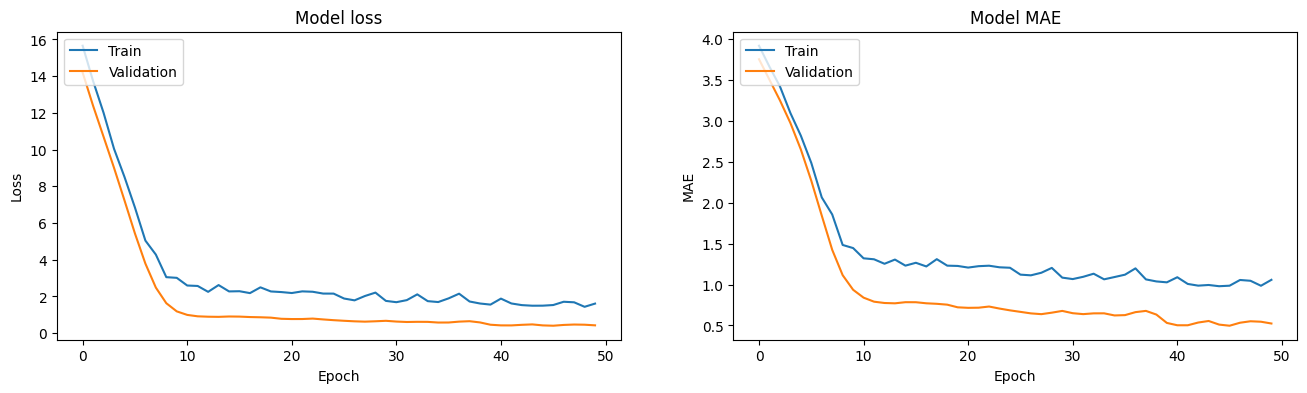

In [ ]:

# Plot training & validation loss values
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
# Get predictions
predictions = model.predict(X_test)

# Compare first 10 predictions with actual values
comparison = pd.DataFrame({'Actual': y_test[:10], 'Predicted': np.squeeze(predictions[:10])})
print(comparison)


6/6 [==============================] - 0s 7ms/step
     Actual  Predicted
66      3.6   3.340741
496     3.7   3.116918
236     3.6   3.485812
254     3.2   3.548378
771     3.8   3.290676
624     3.3   3.395851
325     3.4   3.256831
341     3.5   3.046677
411     3.8   3.219573
798     3.7   3.457291


In [ ]:
# Save the model to a file
model.save('zomato_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Load the model from file
loaded_model = load_model('zomato_model.h5')

# Evaluate the loaded model
loss, mae = loaded_model.evaluate(X_test, y_test)
print(f'Loaded model MAE on Test Set: {mae}')


6/6 [==============================] - 0s 4ms/step - loss: 0.2700 - mae: 0.4305
Loaded model MAE on Test Set: 0.43051889538764954


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='zomato_tuning'
)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2)
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Trial 5 Complete [00h 00m 29s]
val_mae: 0.30406620105107623

Best val_mae So Far: 0.28533703088760376
Total elapsed time: 00h 02m 43s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 480)               2400      
                                                                 
 dropout (Dropout)           (None, 480)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 481       
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Evaluate the best model on the test set
loss, mae = best_model.evaluate(X_test, y_test)
print(f'Tuned Model MAE on Test Set: {mae}')


6/6 [==============================] - 1s 17ms/step - loss: 0.1553 - mae: 0.3049
Tuned Model MAE on Test Set: 0.3048674464225769


6/6 [==============================] - 0s 7ms/step


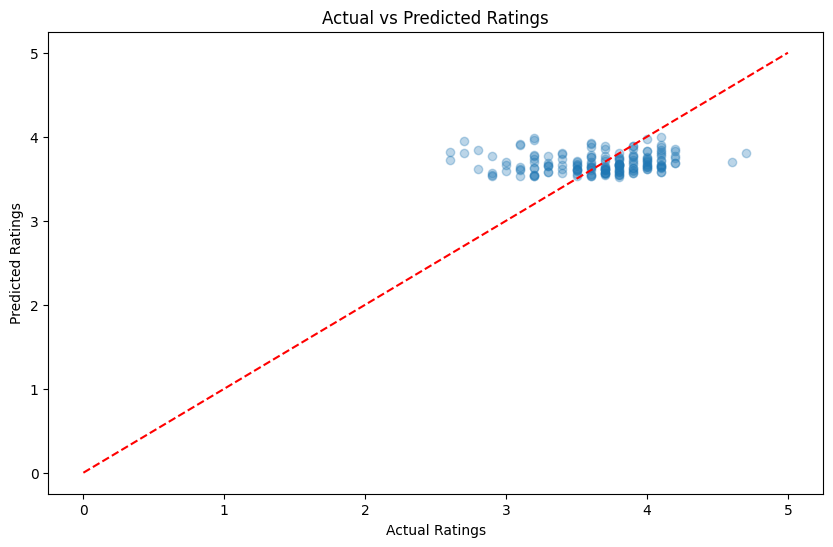

In [ ]:
# Get predictions
predictions = best_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, np.squeeze(predictions), alpha=0.3)
plt.plot([0, 5], [0, 5], color='red', linestyle='--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.6 MB/s eta 0:00:00


ExactExplainer explainer: 172it [00:20,  8.18it/s]


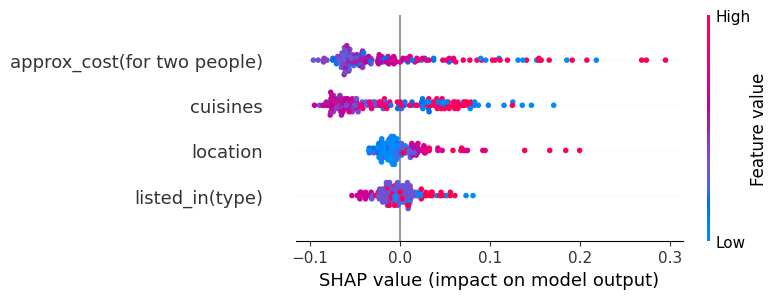

In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Plot SHAP values
shap.summary_plot(shap_values, X_test, feature_names=features)

In [ ]:
# Save the tuned model to a file
best_model.save('zomato_tuned_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the tuned model from file
tuned_model = load_model('zomato_tuned_model.h5')

# Make predictions with the loaded model
tuned_predictions = tuned_model.predict(X_test)

# Compare first 10 predictions with actual values
comparison = pd.DataFrame({'Actual': y_test[:10], 'Tuned Predicted': np.squeeze(tuned_predictions[:10])})
print(comparison)

6/6 [==============================] - 0s 6ms/step
     Actual  Tuned Predicted
66      3.6         3.758846
496     3.7         3.562185
236     3.6         3.783384
254     3.2         3.990099
771     3.8         3.665557
624     3.3         3.657220
325     3.4         3.572510
341     3.5         3.595191
411     3.8         3.546756
798     3.7         3.859067
